In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [6]:
!ls /gdrive/My\ Drive/Dataset/arxiv/*.csv

'/gdrive/My Drive/Dataset/arxiv/arxiv_abstract.csv'
'/gdrive/My Drive/Dataset/arxiv/arxiv_author.csv'
'/gdrive/My Drive/Dataset/arxiv/arxiv_categories.csv'
'/gdrive/My Drive/Dataset/arxiv/arxiv_main.csv'
'/gdrive/My Drive/Dataset/arxiv/main_test.csv'
'/gdrive/My Drive/Dataset/arxiv/main_train.csv'
'/gdrive/My Drive/Dataset/arxiv/test_all.csv'
'/gdrive/My Drive/Dataset/arxiv/test_mul.csv'
'/gdrive/My Drive/Dataset/arxiv/tf_word_vector.csv'
'/gdrive/My Drive/Dataset/arxiv/train_2016.csv'
'/gdrive/My Drive/Dataset/arxiv/train_2017.csv'
'/gdrive/My Drive/Dataset/arxiv/train_all.csv'
'/gdrive/My Drive/Dataset/arxiv/train_mul.csv'


In [0]:
import pandas as pd

In [0]:
pd_cat = pd.read_csv('/gdrive/My Drive/Dataset/arxiv/arxiv_categories.csv',names=["id","cat","cats"])

Create frequent item dataset

In [13]:
id_before = ""
all_cat = []
for i,x in enumerate(pd_cat.values):
  if i%10000 == 0:
    print(i,end=" ")
  #print(x)
  #try:
    #pd_temp_cat = pd_cat[pd_cat["id"]==str(x[0])]
  #print(x)
  pd_id = x[0]
  #pd_date = x[1]
  if id_before!=pd_id:
    if id_before!="":
      #main_writer.writerow([old_x[0],old_x[1],old_x[2],old_x[3],old_x[4],list_cat[0],"|".join(list_cat),"|".join(list_sub_cat),old_x[7],old_x[8]])
      all_cat.append(list_sub_cat)
    id_before = pd_id
    list_cat = []
    list_sub_cat = []    
  if x[1] not in list_cat:
    list_cat.append(x[1])
  if x[2] not in list_sub_cat:
    list_sub_cat.append(x[2])
  old_x = x
  #if i > 20:
  #  break    
#main_walriter.writerow([x[0],x[1],x[2],x[3],x[4],list_cat[0],"|".join(list_cat),"|".join(list_sub_cat),x[7],x[8]])
#file.close()

0 10000 20000 30000 40000 50000 60000 70000 80000 90000 100000 110000 120000 130000 140000 150000 160000 170000 180000 190000 200000 210000 220000 230000 240000 250000 260000 270000 280000 290000 300000 310000 320000 330000 340000 350000 360000 370000 380000 390000 400000 410000 420000 430000 440000 450000 460000 470000 480000 490000 500000 510000 520000 530000 540000 550000 560000 570000 580000 590000 600000 610000 620000 630000 640000 650000 660000 670000 680000 690000 700000 710000 720000 730000 740000 750000 760000 770000 780000 790000 800000 810000 820000 830000 840000 850000 860000 870000 880000 890000 900000 910000 920000 930000 940000 950000 960000 970000 980000 990000 1000000 1010000 1020000 1030000 1040000 1050000 1060000 1070000 1080000 1090000 1100000 1110000 1120000 1130000 1140000 1150000 1160000 1170000 1180000 1190000 1200000 1210000 1220000 1230000 1240000 1250000 1260000 1270000 1280000 1290000 1300000 1310000 1320000 1330000 1340000 1350000 1360000 1370000 1380000 13

In [14]:
all_cat[:10]

[['math.AP', 'math-ph', 'math.MP', 'math.SP'],
 ['nucl-th'],
 ['astro-ph.CO'],
 ['cs.RO'],
 ['hep-th'],
 ['astro-ph'],
 ['math.RT', 'math.QA', 'math.RA'],
 ['stat.ME'],
 ['math.DS'],
 ['math.GR']]

Use pymining package:
https://github.com/bartdag/pymining

In [15]:
!pip install pymining

In [0]:
from pymining import itemmining

In [0]:
relim_input = itemmining.get_relim_input(all_cat)

In [0]:
report = itemmining.relim(relim_input, min_support=10)


In [30]:
report

{frozenset({'bayes-an'}): 16,
 frozenset({'bayes-an', 'physics.data-an'}): 13,
 frozenset({'ao-sci'}): 17,
 frozenset({'ao-sci', 'physics.ao-ph'}): 13,
 frozenset({'econ.TH'}): 31,
 frozenset({'cs.GT', 'econ.TH'}): 11,
 frozenset({'econ.GN'}): 32,
 frozenset({'econ.GN', 'q-fin.EC'}): 32,
 frozenset({'plasm-ph'}): 38,
 frozenset({'physics.plasm-ph', 'plasm-ph'}): 28,
 frozenset({'acc-phys'}): 49,
 frozenset({'acc-phys', 'physics.acc-ph'}): 46,
 frozenset({'atom-ph'}): 123,
 frozenset({'atom-ph', 'chem-ph'}): 21,
 frozenset({'atom-ph', 'physics.atom-ph'}): 68,
 frozenset({'atom-ph', 'physics.atom-ph', 'quant-ph'}): 13,
 frozenset({'atom-ph', 'cond-mat'}): 25,
 frozenset({'atom-ph', 'nucl-th'}): 11,
 frozenset({'atom-ph', 'quant-ph'}): 36,
 frozenset({'atom-ph', 'hep-ph'}): 14,
 frozenset({'cs.GL'}): 147,
 frozenset({'cs.GL', 'cs.SE'}): 11,
 frozenset({'cs.CY', 'cs.GL'}): 19,
 frozenset({'cs.AI', 'cs.GL'}): 10,
 frozenset({'supr-con'}): 175,
 frozenset({'cond-mat', 'supr-con'}): 102,
 fro

Use Orange Package:

https://orange3-associate.readthedocs.io/en/latest/scripting.html#fpgrowth.frequent_itemsets

In [32]:
!pip install Orange3-Associate

    100% |████████████████████████████████| 532kB 8.4MB/s 
  Running setup.py bdist_wheel for Orange3-Associate ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/80/61/4a/dcd517a56d437ea374e32f2c7ffdb31047edab82d82d665af5
Successfully built Orange3-Associate


In [0]:
from orangecontrib.associate.fpgrowth import *  

In [0]:
itemsets = frequent_itemsets(all_cat, 2)

In [38]:
for x in itemsets:
  print(x)
  break

(frozenset({'hep-ph'}), 137524)


create one hot encode

In [0]:
test_cats = []
for x in all_cat:
  test_cats.extend(x)
test_cats = list(set(test_cats))

In [44]:
len(test_cats)

175

In [0]:
from scipy.sparse import lil_matrix

In [0]:
my_data_mat = lil_matrix((len(all_cat),len(test_cats)))

In [0]:
for i,x in enumerate(all_cat):
  for y in x:
    my_data_mat[i,test_cats.index(y)] = 1

In [0]:
gen = frequent_itemsets(my_data_mat, .0001)

In [62]:
list(gen)

[(frozenset({132}), 137524),
 (frozenset({39}), 124600),
 (frozenset({39, 132}), 23331),
 (frozenset({32}), 105380),
 (frozenset({32, 39}), 6359),
 (frozenset({32, 132}), 9312),
 (frozenset({32, 39, 132}), 3248),
 (frozenset({59}), 88804),
 (frozenset({32, 59}), 294),
 (frozenset({39, 59}), 6924),
 (frozenset({32, 39, 59}), 161),
 (frozenset({59, 132}), 1345),
 (frozenset({39, 59, 132}), 651),
 (frozenset({110}), 72459),
 (frozenset({32, 110}), 9251),
 (frozenset({39, 110}), 32106),
 (frozenset({32, 39, 110}), 4666),
 (frozenset({59, 110}), 3553),
 (frozenset({32, 59, 110}), 182),
 (frozenset({39, 59, 110}), 1961),
 (frozenset({110, 132}), 9068),
 (frozenset({32, 110, 132}), 3029),
 (frozenset({39, 110, 132}), 6549),
 (frozenset({32, 39, 110, 132}), 2004),
 (frozenset({59, 110, 132}), 279),
 (frozenset({39, 59, 110, 132}), 205),
 (frozenset({56}), 57905),
 (frozenset({39, 56}), 1263),
 (frozenset({56, 59}), 6983),
 (frozenset({39, 56, 59}), 241),
 (frozenset({56, 132}), 206),
 (frozens

MLXtend library

http://rasbt.github.io/mlxtend/#examples

In [63]:
!pip install mlxtend

    100% |████████████████████████████████| 1.3MB 6.1MB/s 


In [0]:
from mlxtend.frequent_patterns import apriori


In [66]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(all_cat).transform(all_cat)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,acc-phys,adap-org,alg-geom,ao-sci,astro-ph,astro-ph.CO,astro-ph.EP,astro-ph.GA,astro-ph.HE,astro-ph.IM,...,q-fin.TR,quant-ph,solv-int,stat.AP,stat.CO,stat.ME,stat.ML,stat.OT,stat.TH,supr-con
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
apriori(df, min_support=0.001,use_colnames=True)


,support,itemsets
0,0.073992,(astro-ph)
1,0.031344,(astro-ph.CO)
2,0.009921,(astro-ph.EP)
3,0.022436,(astro-ph.GA)
4,0.021262,(astro-ph.HE)
5,0.009725,(astro-ph.IM)
6,0.024864,(astro-ph.SR)
7,0.001684,(chao-dyn)
8,0.009981,(cond-mat)
9,0.011656,(cond-mat.dis-nn)


In [0]:
apr_001 = apriori(df, min_support=0.001,use_colnames=True)

In [71]:
apr_001

,support,itemsets
0,0.073992,(astro-ph)
1,0.031344,(astro-ph.CO)
2,0.009921,(astro-ph.EP)
3,0.022436,(astro-ph.GA)
4,0.021262,(astro-ph.HE)
5,0.009725,(astro-ph.IM)
6,0.024864,(astro-ph.SR)
7,0.001684,(chao-dyn)
8,0.009981,(cond-mat)
9,0.011656,(cond-mat.dis-nn)


In [73]:
!ls /gdrive/My\ Drive/fall2018/ArxivMining

 arxiv-mining.pptx		  'Independent Study Proposal.pptx'
'INDEPENDENT STUDY PROPOSAL.pdf'


In [0]:
apr_001.to_csv("/gdrive/My Drive/fall2018/ArxivMining/apr_001.csv")

In [0]:
apr_0001 = apriori(df, min_support=.0001,use_colnames=True)

In [0]:
apr_0001.to_csv("/gdrive/My Drive/fall2018/ArxivMining/apr_0001.csv")

In [80]:
apr_0001.sort_values("support",ascending=False)

,support,itemsets
72,0.096561,(hep-ph)
73,0.087487,(hep-th)
2,0.073992,(astro-ph)
159,0.062353,(quant-ph)
69,0.050877,(gr-qc)
15,0.040658,(cond-mat.mes-hall)
74,0.037954,(math-ph)
793,0.037954,"(math.MP, math-ph)"
95,0.037954,(math.MP)
16,0.037885,(cond-mat.mtrl-sci)


In [0]:
apr_0001["total_set"] = apr_0001.itemsets.apply(lambda x: len(x))

In [85]:
apr_0001.describe()

,support,total_set
count,1765.000000,1765.000000
mean,0.001434,2.263456
std,0.005437,0.716066
min,0.000100,1.000000
25%,0.000146,2.000000
50%,0.000254,2.000000
75%,0.000628,3.000000
max,0.096561,5.000000


In [87]:
!pip install networkx

In [0]:
import networkx as nx

In [0]:
apr_0001_graph = nx.DiGraph()

In [0]:
for x in apr_0001[apr_0001.total_set==1].itemsets.values:
  val_list = list(x)
  apr_0001_graph.add_node(val_list[0])

In [0]:
for x in apr_0001[apr_0001.total_set==2].itemsets.values:
  val_list = list(set(x))
  #print(" + ".join(val_list))
  two_name = " + ".join(set(val_list))
  apr_0001_graph.add_node(two_name)
  apr_0001_graph.add_edge(val_list[0],two_name)
  apr_0001_graph.add_edge(val_list[1],two_name)
  #apr_0001_graph.add_node(val_list[0])

In [157]:
apr_0001_graph.edges

OutEdgeView([('adap-org', 'nlin.AO + adap-org'), ('alg-geom', 'alg-geom + hep-th'), ('alg-geom', 'alg-geom + math.AG'), ('astro-ph', 'astro-ph + cond-mat'), ('astro-ph', 'cond-mat.stat-mech + astro-ph'), ('astro-ph', 'gr-qc + astro-ph'), ('astro-ph', 'astro-ph + hep-ex'), ('astro-ph', 'hep-ph + astro-ph'), ('astro-ph', 'astro-ph + hep-th'), ('astro-ph', 'astro-ph + math-ph'), ('astro-ph', 'astro-ph + math.MP'), ('astro-ph', 'nlin.CD + astro-ph'), ('astro-ph', 'nucl-ex + astro-ph'), ('astro-ph', 'nucl-th + astro-ph'), ('astro-ph', 'physics.atom-ph + astro-ph'), ('astro-ph', 'physics.flu-dyn + astro-ph'), ('astro-ph', 'physics.geo-ph + astro-ph'), ('astro-ph', 'astro-ph + physics.plasm-ph'), ('astro-ph', 'physics.space-ph + astro-ph'), ('astro-ph', 'quant-ph + astro-ph'), ('astro-ph.CO', 'astro-ph.EP + astro-ph.CO'), ('astro-ph.CO', 'astro-ph.GA + astro-ph.CO'), ('astro-ph.CO', 'astro-ph.HE + astro-ph.CO'), ('astro-ph.CO', 'astro-ph.CO + astro-ph.IM'), ('astro-ph.CO', 'astro-ph.CO + astr

In [158]:
from itertools import permutations,combinations

for x in apr_0001[apr_0001.total_set==3].itemsets.values:
  val_list = list(set(x))
  #print(" + ".join(val_list))
  three_name = " + ".join(set(val_list))
  print(two_name)
  print(list(permutations(val_list,2)))
  print(list(combinations(val_list,2)))
  for y in list(combinations(val_list,2)):
    two_name = " + ".join(set(y))
    #print(two_name)
    #print(apr_0001_graph.node[two_name])
    if apr_0001_graph.nodes.get(two_name) != None:
      apr_0001_graph.add_edge(two_name,three_name)
  #break
  #apr_0001_graph.add_node(two_name)
  #apr_0001_graph.add_edge(val_list[0],two_name)
  #apr_0001_graph.add_edge(val_list[1],two_name)
  #apr_0001_graph.add_node(val_list[0])

stat.ML + stat.TH
[('alg-geom', 'hep-th'), ('alg-geom', 'math.AG'), ('hep-th', 'alg-geom'), ('hep-th', 'math.AG'), ('math.AG', 'alg-geom'), ('math.AG', 'hep-th')]
[('alg-geom', 'hep-th'), ('alg-geom', 'math.AG'), ('hep-th', 'math.AG')]
hep-th + math.AG
[('gr-qc', 'hep-ph'), ('gr-qc', 'astro-ph'), ('hep-ph', 'gr-qc'), ('hep-ph', 'astro-ph'), ('astro-ph', 'gr-qc'), ('astro-ph', 'hep-ph')]
[('gr-qc', 'hep-ph'), ('gr-qc', 'astro-ph'), ('hep-ph', 'astro-ph')]
hep-ph + astro-ph
[('gr-qc', 'hep-th'), ('gr-qc', 'astro-ph'), ('hep-th', 'gr-qc'), ('hep-th', 'astro-ph'), ('astro-ph', 'gr-qc'), ('astro-ph', 'hep-th')]
[('gr-qc', 'hep-th'), ('gr-qc', 'astro-ph'), ('hep-th', 'astro-ph')]
astro-ph + hep-th
[('gr-qc', 'astro-ph'), ('gr-qc', 'math-ph'), ('astro-ph', 'gr-qc'), ('astro-ph', 'math-ph'), ('math-ph', 'gr-qc'), ('math-ph', 'astro-ph')]
[('gr-qc', 'astro-ph'), ('gr-qc', 'math-ph'), ('astro-ph', 'math-ph')]
astro-ph + math-ph
[('gr-qc', 'math.MP'), ('gr-qc', 'astro-ph'), ('math.MP', 'gr-qc'), 

In [0]:
from itertools import permutations,combinations

for x in apr_0001[apr_0001.total_set==4].itemsets.values:
  val_list = list(set(x))
  #print(" + ".join(val_list))
  three_name = " + ".join(set(val_list))
  #print(two_name)
  #print(list(permutations(val_list,2)))
  #print(list(combinations(val_list,2)))
  for y in list(combinations(val_list,3)):
    two_name = " + ".join(set(y))
    #print(two_name)
    #print(apr_0001_graph.node[two_name])
    if apr_0001_graph.nodes.get(two_name) != None:
      apr_0001_graph.add_edge(two_name,three_name)
  #break
  #apr_0001_graph.add_node(two_name)
  #apr_0001_graph.add_edge(val_list[0],two_name)
  #apr_0001_graph.add_edge(val_list[1],two_name)
  #apr_0001_graph.add_node(val_list[0])

In [0]:
from itertools import permutations,combinations

for x in apr_0001[apr_0001.total_set==5].itemsets.values:
  val_list = list(set(x))
  #print(" + ".join(val_list))
  three_name = " + ".join(set(val_list))
  #print(two_name)
  #print(list(permutations(val_list,2)))
  #print(list(combinations(val_list,2)))
  for y in list(combinations(val_list,4)):
    two_name = " + ".join(set(y))
    #print(two_name)
    #print(apr_0001_graph.node[two_name])
    if apr_0001_graph.nodes.get(two_name) != None:
      apr_0001_graph.add_edge(two_name,three_name)
  #break
  #apr_0001_graph.add_node(two_name)
  #apr_0001_graph.add_edge(val_list[0],two_name)
  #apr_0001_graph.add_edge(val_list[1],two_name)
  #apr_0001_graph.add_node(val_list[0])

In [159]:
apr_0001_graph.edges

OutEdgeView([('adap-org', 'nlin.AO + adap-org'), ('alg-geom', 'alg-geom + hep-th'), ('alg-geom', 'alg-geom + math.AG'), ('astro-ph', 'astro-ph + cond-mat'), ('astro-ph', 'cond-mat.stat-mech + astro-ph'), ('astro-ph', 'gr-qc + astro-ph'), ('astro-ph', 'astro-ph + hep-ex'), ('astro-ph', 'hep-ph + astro-ph'), ('astro-ph', 'astro-ph + hep-th'), ('astro-ph', 'astro-ph + math-ph'), ('astro-ph', 'astro-ph + math.MP'), ('astro-ph', 'nlin.CD + astro-ph'), ('astro-ph', 'nucl-ex + astro-ph'), ('astro-ph', 'nucl-th + astro-ph'), ('astro-ph', 'physics.atom-ph + astro-ph'), ('astro-ph', 'physics.flu-dyn + astro-ph'), ('astro-ph', 'physics.geo-ph + astro-ph'), ('astro-ph', 'astro-ph + physics.plasm-ph'), ('astro-ph', 'physics.space-ph + astro-ph'), ('astro-ph', 'quant-ph + astro-ph'), ('astro-ph.CO', 'astro-ph.EP + astro-ph.CO'), ('astro-ph.CO', 'astro-ph.GA + astro-ph.CO'), ('astro-ph.CO', 'astro-ph.HE + astro-ph.CO'), ('astro-ph.CO', 'astro-ph.CO + astro-ph.IM'), ('astro-ph.CO', 'astro-ph.CO + astr

In [142]:
nx.__version__

'2.2'

In [149]:
!apt-cache search graphviz

codecgraph - Generates graphviz graphs from HDA-Intel codec information
dot2tex - Graphviz to LaTeX converter
graphviz - rich set of graph drawing tools
graphviz-doc - additional documentation for graphviz
kgraphviewer - GraphViz dot graph viewer
kgraphviewer-dbg - GraphViz dot graph viewer for KDE 4 debug files
kgraphviewer-dev - GraphViz dot graph viewer - devel files
libghc-graphviz-dev - bindings to Graphviz for graph visualization
libghc-graphviz-doc - bindings to Graphviz for graph visualization; documentation
libghc-graphviz-prof - bindings to Graphviz for graph visualization; profiling libraries
libgraph-easy-perl - Perl module to convert or render graphs (as ASCII, HTML, SVG or via Graphviz)
libgraph-writer-graphviz-perl - GraphViz Writer for Graph object
libgraphviz-dev - graphviz libs and headers against which to build applications
libgraphviz-perl - Perl interface to the GraphViz graphing tool
libgv-guile - Guile bindings for graphviz
libgv-lua - Lua bindings for graphviz
l

In [151]:
!apt-get install libgraphviz-dev graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following additional packages will be installed:
  adwaita-icon-theme gtk-update-icon-cache hicolor-icon-theme
  humanity-icon-theme libatk1.0-0 libatk1.0-data libavahi-client3
  libavahi-common-data libavahi-common3 libcroco3 libcups2 libgail-common
  libgail18 libgdk-pixbuf2.0-0 libgdk-pixbuf2.0-bin libgdk-pixbuf2.0-common
  libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk librsvg2-2
  librsvg2-common libxcomposite1 libxcursor1 libxdamage1 libxdot4 libxfixes3
  libxi6 libxinerama1 libxrandr2 shared-mime-info ubuntu-mono
Suggested packages:
  cups-common gvfs librsvg2-bin
The following NEW packages will be installed:
  adwaita-icon-theme gtk-update-icon-cache hicolor-icon-theme
  humanity-icon-theme libatk1.0-0 libatk1.0-data libavahi-client3
  libavahi-common-data libavahi-common3 libcroco3 libcups2 libgail-common
  libga

In [152]:
!pip install pygraphviz

  Using cached https://files.pythonhosted.org/packages/7e/b1/d6d849ddaf6f11036f9980d433f383d4c13d1ebcfc3cd09bc845bda7e433/pygraphviz-1.5.zip
  Running setup.py bdist_wheel for pygraphviz ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/65/54/69/1aee9e66ab19916293208d4c9de0d3898adebe6b2eeff6476b
Successfully built pygraphviz


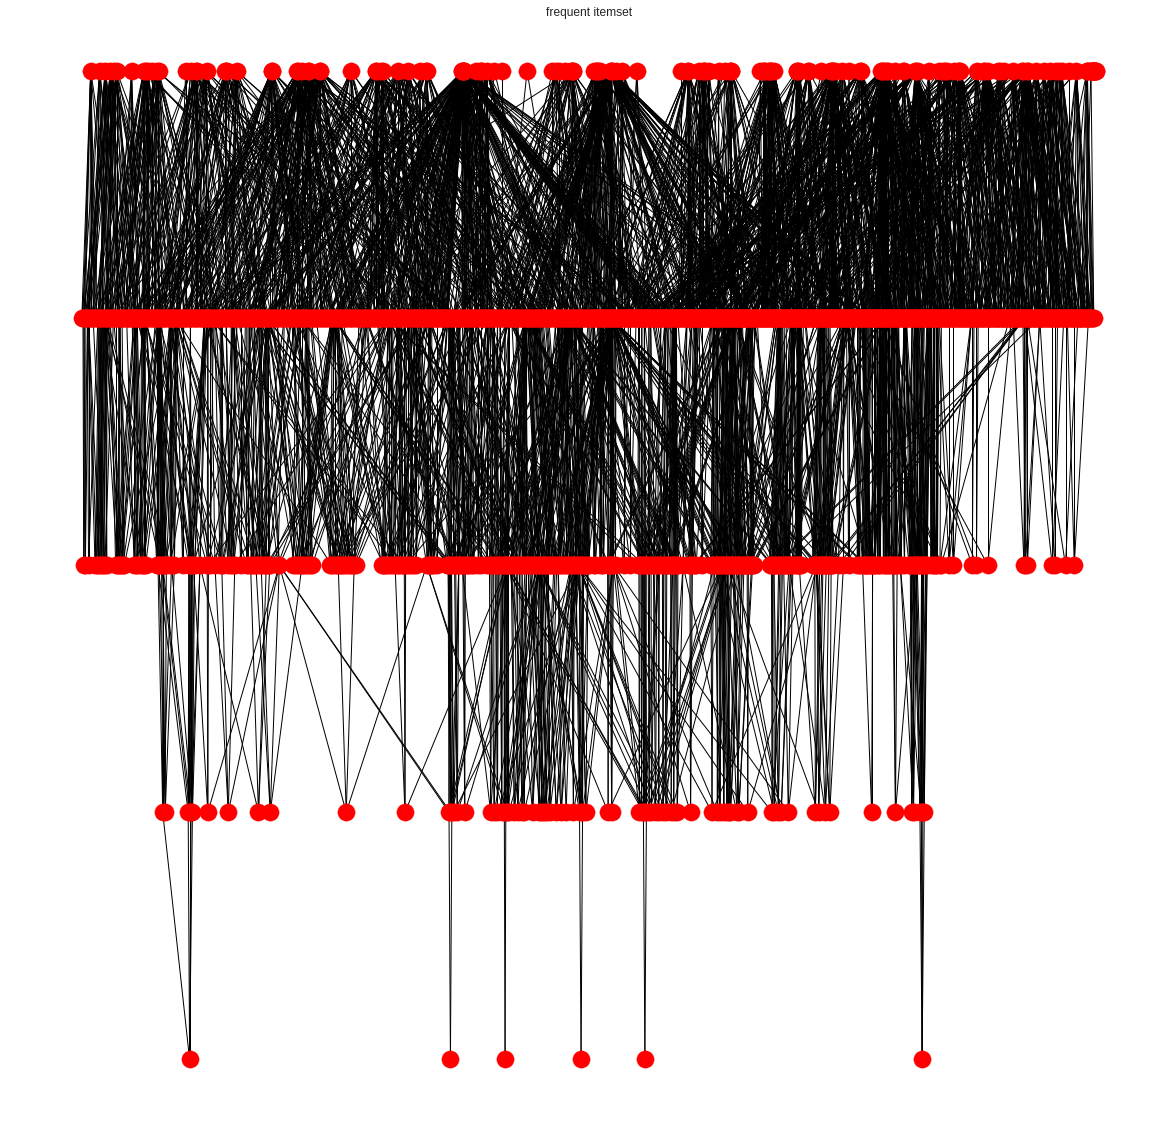

In [166]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
plt.title('frequent itemset')
pos=nx.nx_agraph.graphviz_layout(apr_0001_graph, prog='dot')
nx.draw(apr_0001_graph, pos, with_labels=False, arrows=False)

In [169]:
!pip install pydot

In [0]:
from networkx.drawing.nx_pydot import write_dot
write_dot(apr_0001_graph,"apr_0001.dot")

In [0]:
!dot -Tpdf apr_0001.dot -o apr_0001.pdf